# Simple Linear regression

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sns
from pandas import Series, DataFrame

In [16]:
%matplotlib inline
rcParams ['figure.figsize'] = 10,8
sns.set_style('whitegrid')

In [ ]:
# Rooms variables
rooms = 2 * np.random.randn(100,1)+3

rooms[0:10]

array([[2.42839464],
       [4.80327866],
       [0.88021267],
       [4.3334948 ],
       [3.55826986],
       [4.88545219],
       [0.58192189],
       [5.60497198],
       [3.68691293],
       [4.31873029]])

In [ ]:
# Price variables
price = 265 + 6 * rooms + abs(np.random.randn(100,1))

price[0:10]

array([[279.62508552],
       [294.61376276],
       [270.85278079],
       [292.64005195],
       [287.05259145],
       [294.86466306],
       [269.63427445],
       [299.04896663],
       [287.84185894],
       [291.25901196]])

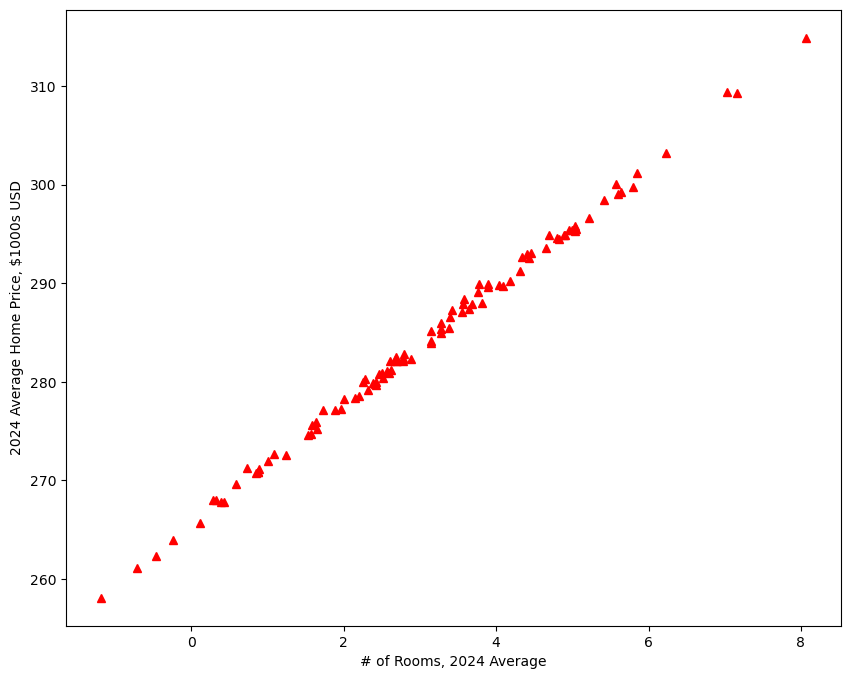

In [10]:
# scatterplot
plt.plot (rooms,price, 'r^') # r^ is specify point plot should be generate instead of defulte line plot
plt.xlabel ('# of Rooms, 2024 Average')
plt.ylabel ('2024 Average Home Price, $1000s USD')

plt.show()

 As the number of rooms increase the price oh the homes increase

In [11]:
X = rooms
y = price

LinReg = LinearRegression()
# fit model to data
LinReg.fit(X, y)

# In order to evaluate how well this model perfoms, we need the intercept and the coefficient
print (LinReg.intercept_, LinReg.coef_)

[265.63515063] [[6.05242938]]


*Simple Algebra*
- y = mx + b
- b = intercept = 265.63

*Estimated Coefficients*
- LinReg.coef_ = [6.05] Estimated coefficients for the terms in the linear regression problem.

In [13]:
print (LinReg.score(X, y))

# score function returns the coefficient of determination which is our score of prediction


0.9975712627768356


it shows our model perfomes very well and R squared value is close to 1

# Multiple linear regression

In [17]:
# import the Counter class from the collections module, which will be used for counting the occurrence of elements in a dataset, facilitating frequency analysis.

from collections import Counter

#### (Multiple) linear regression on the enrollment data

In [18]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/enrollment_forecast.csv'

enroll_df = pd.read_csv (address)

enroll_df.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']

enroll_df.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


According to assumptions of linear model, our variables all need to be continuous numeric variables

we also need to make sure that there's a linear relationship between predictors and predicted

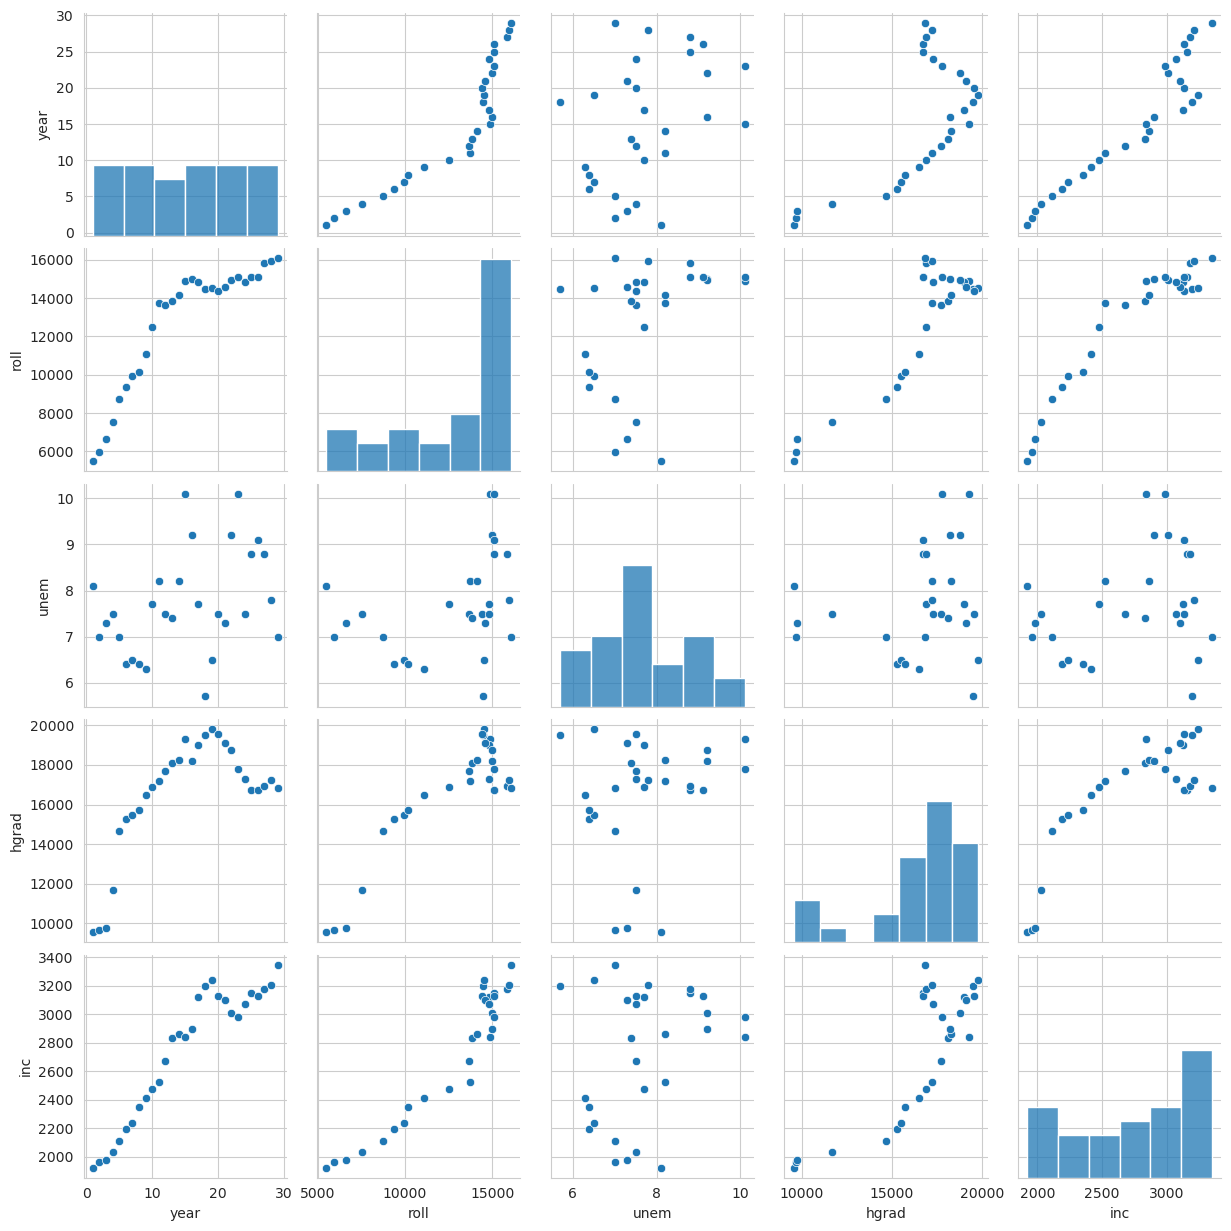

In [19]:
# Check for correlation

sns.pairplot(enroll_df)


In [20]:
# Check the correlation

print (enroll_df.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [21]:
# create subset

enroll_data = enroll_df[['unem', 'hgrad']].values

enroll_target = enroll_df['roll'].values

enroll_data_names = ['unem', 'hgrade']

X,y = scale(enroll_data), enroll_target

In [22]:
# Checking for missing values

missing_values = X == np.NaN
X[missing_values == True]

array([], dtype=float64)

we have empty array which means there is not any missing values

In [23]:
# instantiate linear regrassion object
LinReg = LinearRegression()
LinReg.fit(X, y)
print(LinReg.score(X, y))

0.8488812666133723


max good score would be 0.99 and min score would be 0.01. If you see the value 0 or 1 you should that there is something wrong with your data
***this model has R Squard value of 0.85 which is not bad prediction***

# Logistic regression: Concepts

In [27]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

## Logistic regression on the titanic dataset

This data came from Kaggle (https://www.kaggle.com/c/titanic/data)


In [32]:
url = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/titanic-training-data.csv'

titanic_training_df = pd.read_csv(url)
# assign to columns
titanic_training_df.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

print (titanic_training_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
print (titanic_training_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embark       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


***As we see we have missing values in age and Cabin***

Just a quick fyi (we will examine these variables more closely in a minute):

##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

<Axes: xlabel='Survived', ylabel='count'>

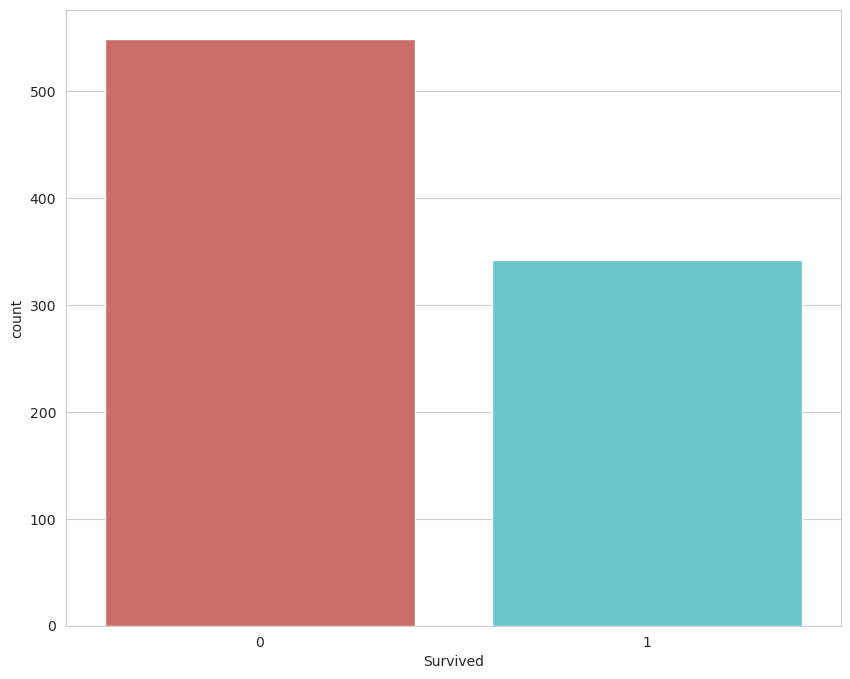

In [35]:
# First we want to check out our target variable is binary

sns.countplot(x='Survived', hue='Survived', data=titanic_training_df, palette='hls', legend=False)

In [37]:
# checking missing values

# is null method
titanic_training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
# Another way to check number of rows in dataset

titanic_training_df.describe()

,PassengerId,Survived,Pclass,age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# Drop variables that are not relevant for predicting 

titanic_data = titanic_training_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

titanic_data.head()

,PassengerId,Survived,Pclass,Sex,age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Parch', ylabel='age'>

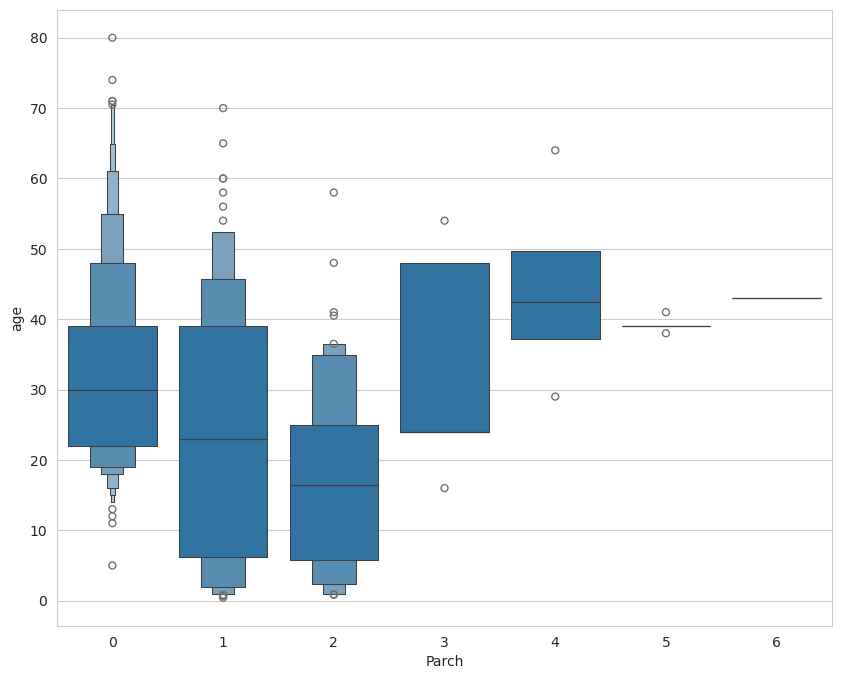

In [42]:
# impute for missing variables
sns.boxenplot(x='Parch', y='age', data=titanic_data)

In [47]:
# find average age pre Parch category

Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean(numeric_only=True)

,PassengerId,Survived,Pclass,age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [53]:
# write a function to impute missing values
def age_approx(cols):
    Age = cols.iloc[0]
    Parch = cols.iloc[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30  # average age value of people on the boat
        
    return Age # is says if there is an age it is not necessary to above process


In [54]:
# apply the function 
titanic_data ['age'] = titanic_data[['age', 'Parch']].apply(age_approx, axis=1)

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [55]:
# drop missing values because we only have 2 missing valuse which dropping them would change our result 

titanic_data.dropna(inplace=True)
# we want to reset our index in order to have accurate index for our output data set
titanic_data.reset_index(inplace=True, drop=True)

print (titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


### Logistic regression: Re-encode variable

In [58]:
# First thing to do is convert categorical variables to dummy indicators

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex'] 
gender_endoded = label_encoder.fit_transform(gender_cat)

gender_endoded[0:5]

array([1, 0, 0, 0, 1])

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [60]:
# Create gender DataFrame

gender_df = pd.DataFrame(gender_endoded, columns=['male_gendere']) # it helps us to undersand for male or female

gender_df.head()

,male_gendere
0,1
1,0
2,0
3,0
4,1


In [65]:
embarked_cat= titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [66]:
# we need to use one-hot encoding in order to get binary variable 

from sklearn.preprocessing import OneHotEncoder

In [ ]:
binary_encoder = OneHotEncoder(categories='auto')
embarked_onehot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1)) # we use reshape method to reshape it as a column.
embarked_onehot_mat = embarked_onehot.toarray() # we want to be a matrix therefore we use toarray() method.
emabrked_df = pd.DataFrame (embarked_onehot_mat, columns=['C', 'Q', 'S']) # transformet to data frame and then we name our columns.
emabrked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [68]:
# drop old emabarked

titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

titanic_data.head()

,PassengerId,Survived,Pclass,age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [71]:
# concanate our new variables

titanic_dmy = pd.concat([titanic_data, gender_df, emabrked_df], axis=1, verify_integrity=True).astype(float)

titanic_dmy[0:5]

,PassengerId,Survived,Pclass,age,SibSp,Parch,Fare,male_gendere,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


### Logistic regression: Validating dataset

<Axes: >

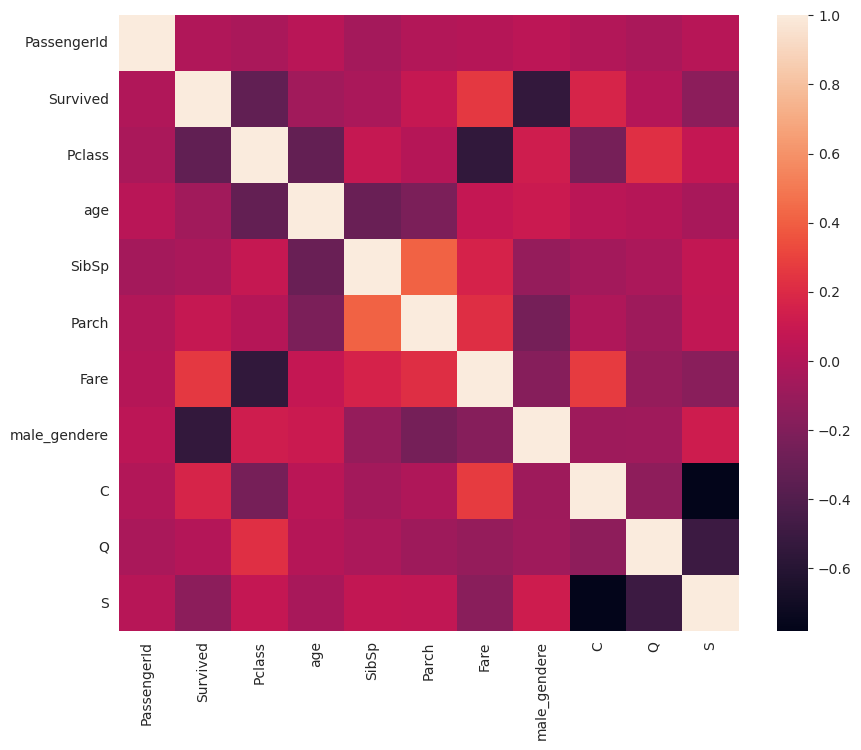

In [73]:
# we start with checking for independence between features

sns.heatmap(titanic_dmy.corr())

If we have correlation that's close to 1 or -1 that mean we have sort of strong linear relation between a variable pair.
In above heatmap we are looking valuse that is very very light or close to wight or very very dark or close to black for example between Pclass and Fare there is a black cube whcih means there are not diffiently independent to one and another.

In [74]:
# Let one of those

titanic_dmy.drop(['Fare'], axis=1, inplace=True)


# The operation modifies the original titanic_dmy DataFrame directly.
# No new DataFrame is returned.
# After this operation, the column Fare is permanently removed from titanic_dmy.

titanic_dmy.head()

,PassengerId,Survived,Pclass,age,SibSp,Parch,male_gendere,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


we drop Fare variable because it was not independent

In [75]:
# How many predictor we have

titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    float64
 1   Survived      889 non-null    float64
 2   Pclass        889 non-null    float64
 3   age           889 non-null    float64
 4   SibSp         889 non-null    float64
 5   Parch         889 non-null    float64
 6   male_gendere  889 non-null    float64
 7   C             889 non-null    float64
 8   Q             889 non-null    float64
 9   S             889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


***We should have at leaste 50 recorde per predective feature in order to do Logestic regression***

We have 7 predictor the last actually was a predictor that we seperate in three columns

### Logistic regression: Model deployment

In [79]:
# Break data to training and test sets

X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1), #  we don't call "Survived" variable because we want to predict this variable
                                                    titanic_dmy['Survived'], test_size=0.20, # for y varibale we actually want to be "Survived" variable with the size of 20%
                                                    random_state=200 
                                                    ) 

In [ ]:
print(X_train.shape) # call the shape method
print(y_train.shape)

(711, 9)
(711,)


In [82]:
X_train[0:5]

,PassengerId,Pclass,age,SibSp,Parch,male_gendere,C,Q,S
719,721.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,3.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,1.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,3.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


In [83]:
# Instantiate Logestic model


LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train.values, y_train.values)


LogisticRegression(solver='liblinear')

In [85]:
# Use model to make prediction
y_pred = LogReg.predict(X_test.values)

### Logistic regression: Model evaluation

In [86]:
# How well our model works
# First classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       109
         1.0       0.84      0.70      0.76        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [87]:
# K-fold cross-validation and look at confusion metrix

y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[384,  56],
       [ 90, 181]])

it telling us 384 and 181 are the number of correct predictions and 90 and 56 are number incorrect predictions

In [88]:
precision_score(y_train, y_train_pred)

0.7637130801687764

### Logistic regression: Test prediction

In [89]:
titanic_dmy[863:864] # pull up a row in index position 863

,PassengerId,Survived,Pclass,age,SibSp,Parch,male_gendere,C,Q,S
863,866.0,1.0,2.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
test_passenger = np.array(['866', '2', '40', '0', '0', '0', '0', '0' ,'1']).astype(float).reshape(1, -1) # make small changes in above value that our model predict in other situation

## we need to make sure we have numeric values

print (LogReg.predict(test_passenger))
print (LogReg.predict_proba(test_passenger)) # we want to print out probability 

[1.]
[[0.24588769 0.75411231]]


 What predict is that our passenger will survived because our passenger in index possition 863 survived as well and the probability of this prediction be correct is 75%

# Cluster analysis with the K-means method